# Thera Campaign for selling personal loans.

# Business problem: 

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. 

As a Data Scientist, **the management want us to explore ways of converting its liability customers to personal loan customers(while retaining them as depositors)**. In other words, the department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.


## Data Description:
The dataset contains data on 5000 customers. 

The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). 

Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Also, we need to help **the retail marketing department to build better targets that can help increase the success ration with a minimal budget**.


## Attribute Information:
- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer 
- ZIP Code: Home Address ZIP code.
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month 
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any. 
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?


In [1]:
## importing libaries and packages 
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, classification_report

## importing necessary metrics to evaluate model performance

In [2]:
# importing data
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head()  

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.shape

(5000, 14)

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [11]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

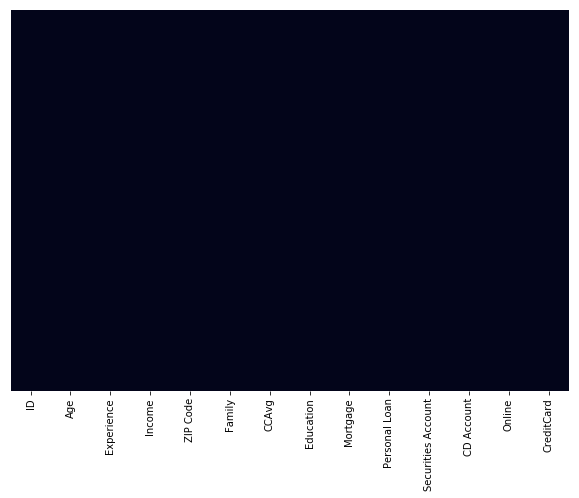

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False ,cbar=False);

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [14]:
df[df['Experience']<0].head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0


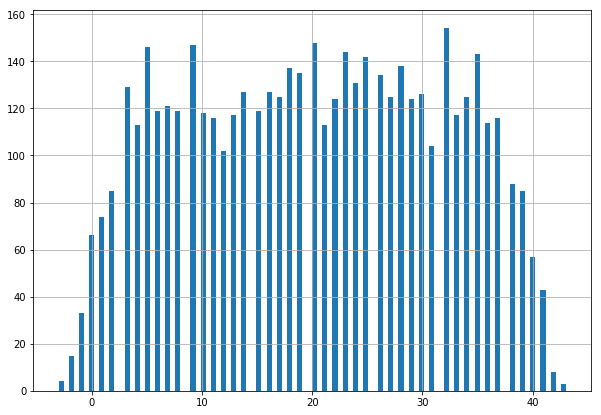

In [15]:
plt.figure(figsize=(10,7))
df.Experience.hist(bins=100);
plt.show()

In [16]:
##??

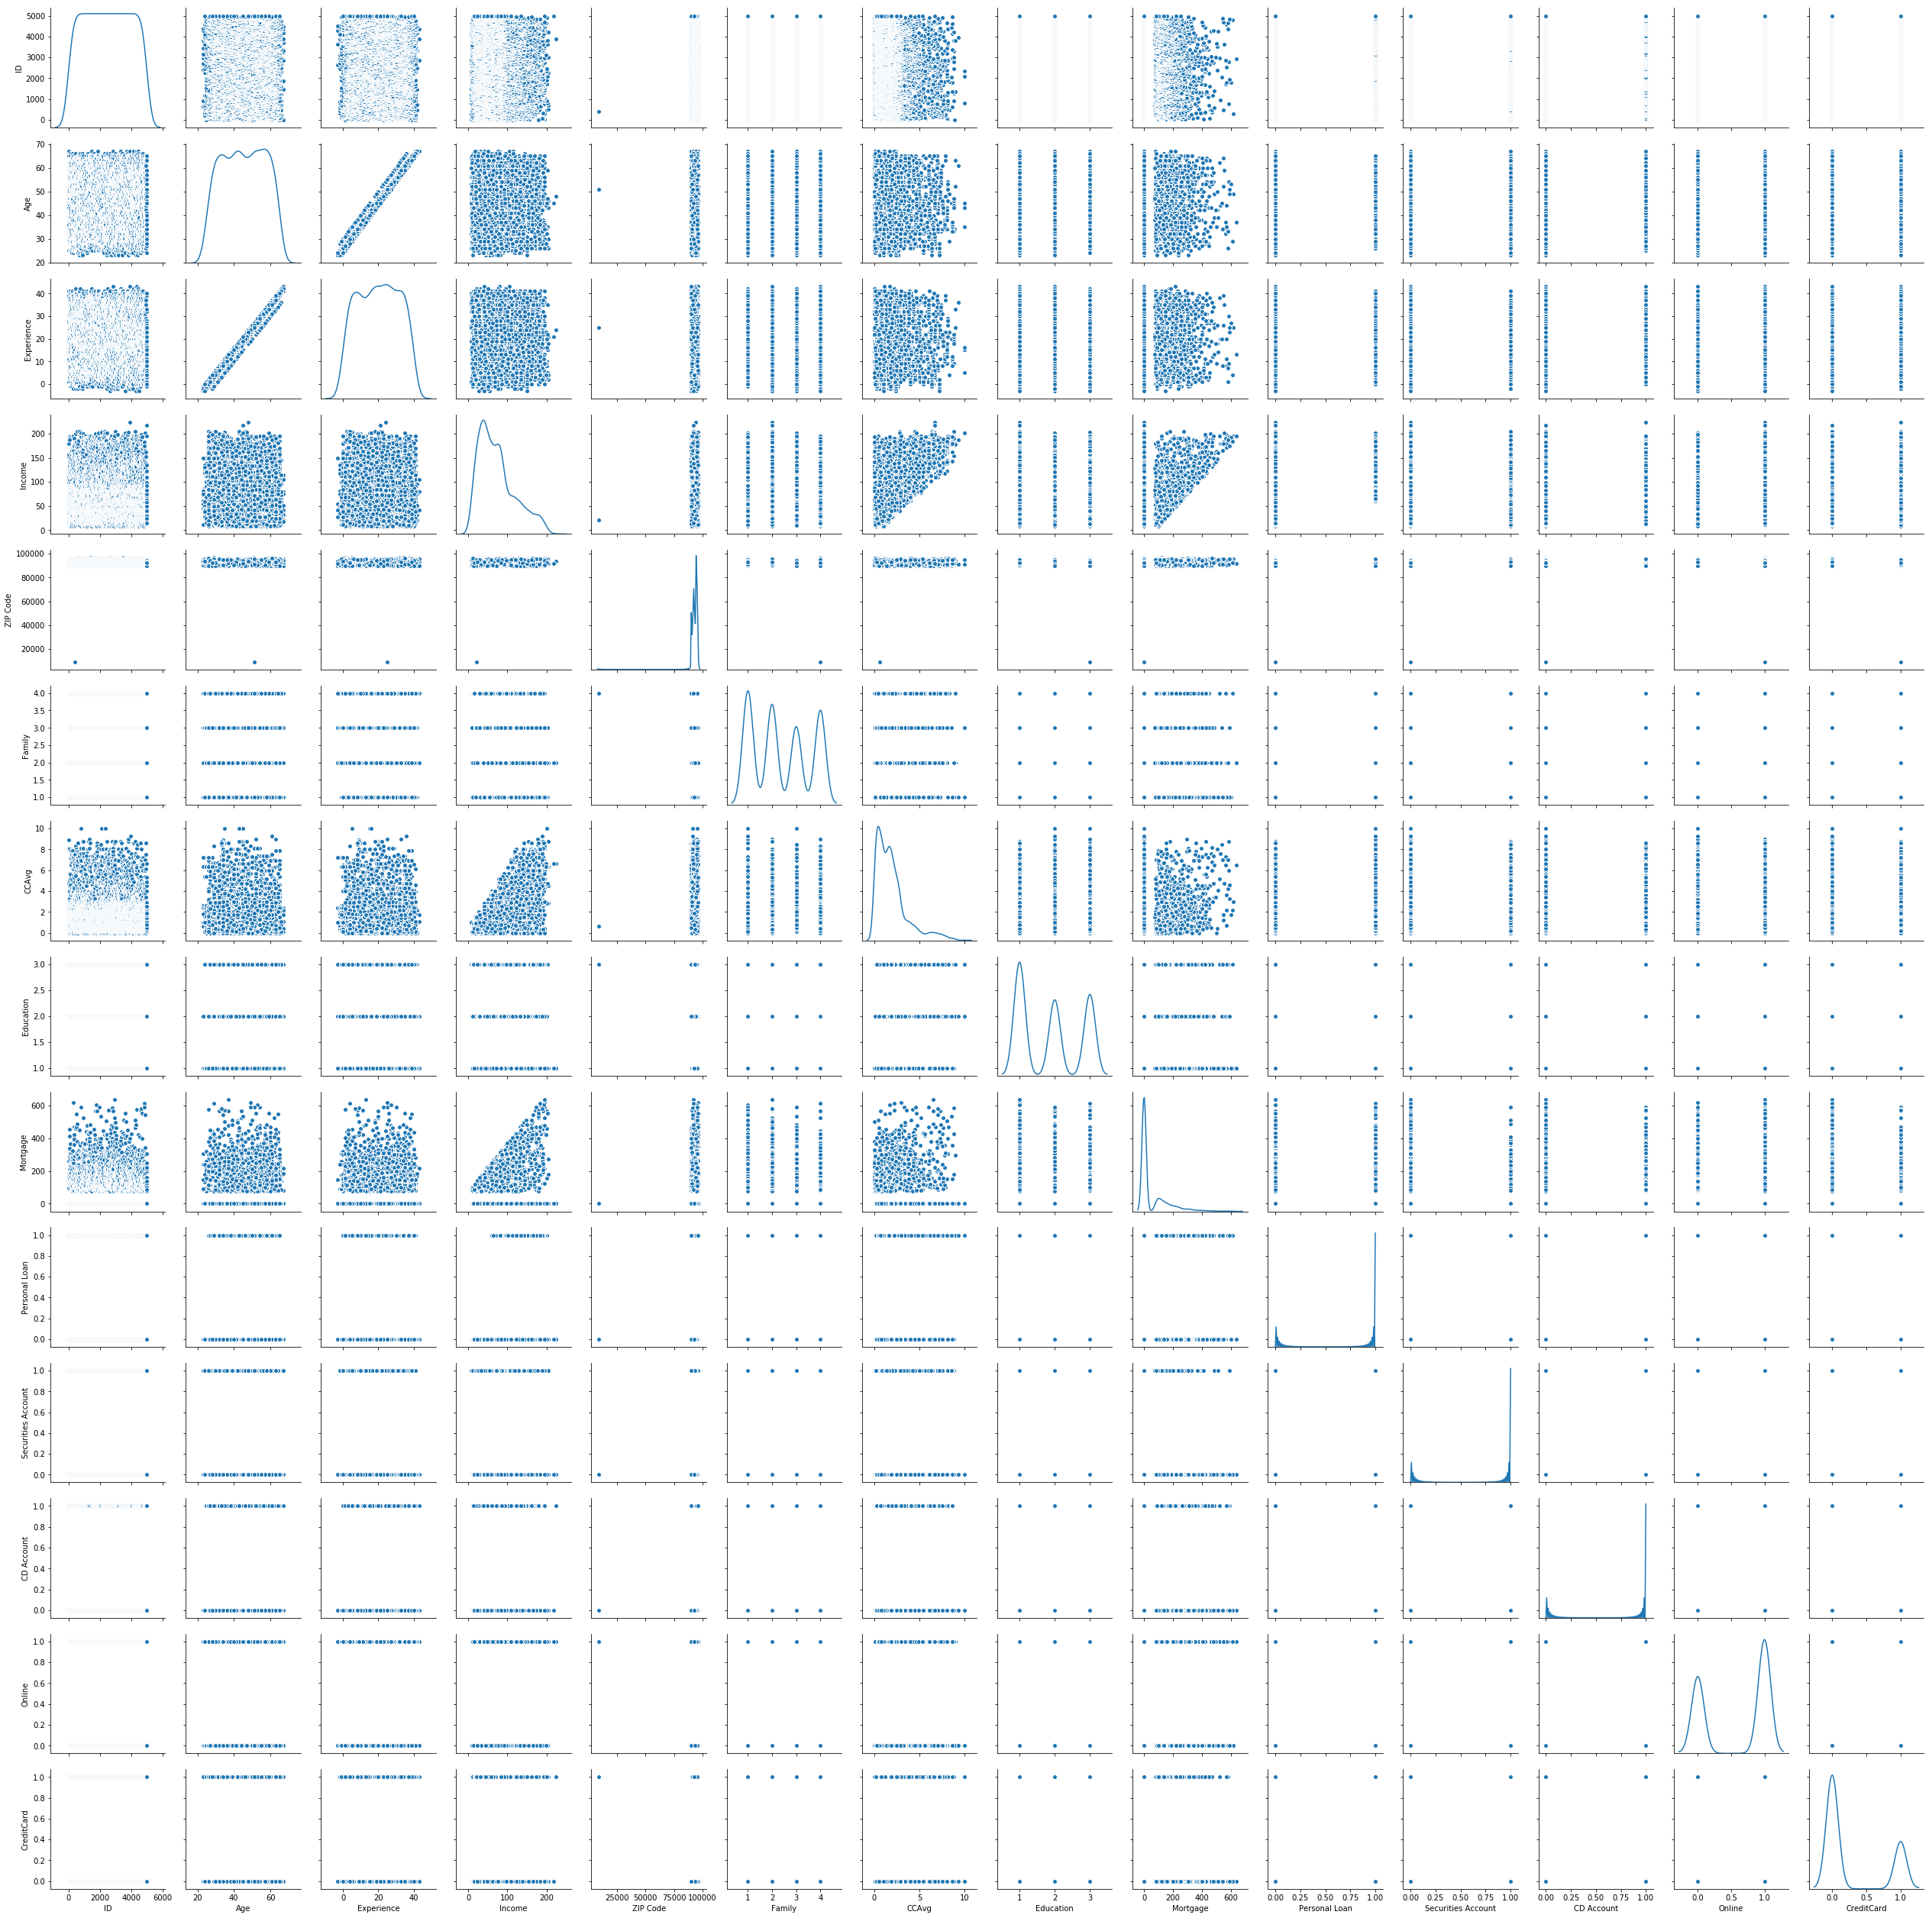

In [17]:
sns.pairplot(df,diag_kind='kde')
plt.show()

In [18]:
## this could be typo or error while entering 
## we could impute this using age 

df[df.Experience < 0]['Age'].value_counts()

25    18
24    17
23    12
29     3
28     1
26     1
Name: Age, dtype: int64

In [19]:
ages = list(df[df.Experience < 0]['Age'].unique())
indexes = df[df['Experience']<0].index.tolist()

In [20]:
for idx in indexes:
    for age in ages:
        df.loc[idx,'Experience'] = df[(df['Age']==age)&(df['Experience']>0)]['Experience'].mean()

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.135743,11.413140,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


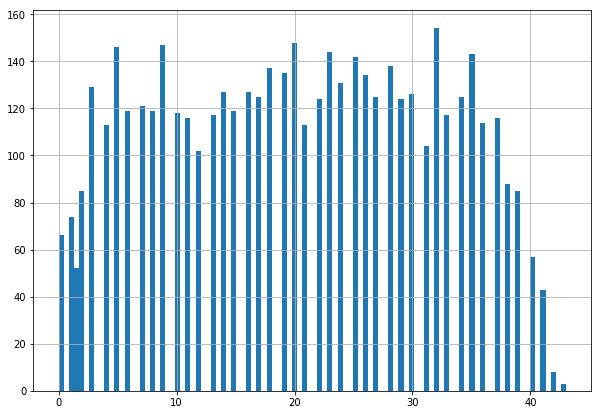

In [22]:
plt.figure(figsize=(10,7))
df.Experience.hist(bins=100);
plt.show()

In [23]:
df.drop(['ID','ZIP Code'],axis=1,inplace=True)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,4,1.0,2,0,0,0,0,0,1


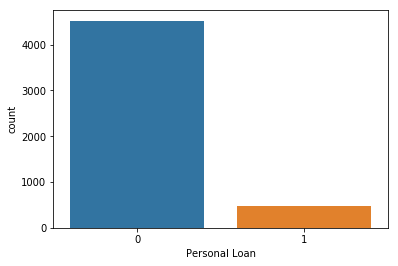

In [24]:
sns.countplot(df['Personal Loan'])
plt.show();

In [136]:
## Contingency table

def get_contingency_table(df,target,var):
    ct_res = pd.crosstab(df[var],df[target],margins=True)
    ct_res['Accepted (%)']=round(ct_res[1]/ct_res['All']*100,2)
    return ct_res.drop(columns=['All'])

    

In [137]:
get_contingency_table(df,'Personal Loan','CreditCard')

Personal Loan,0,1,Accepted (%)
CreditCard,,,
0,3193,337,9.55
1,1327,143,9.73
All,4520,480,9.60


In [138]:
get_contingency_table(df,'Personal Loan','Online')

Personal Loan,0,1,Accepted (%)
Online,,,
0,1827,189,9.38
1,2693,291,9.75
All,4520,480,9.60


In [139]:
get_contingency_table(df,'Personal Loan','Education')

Personal Loan,0,1,Accepted (%)
Education,,,
1,2003,93,4.44
2,1221,182,12.97
3,1296,205,13.66
All,4520,480,9.60


In [140]:
get_contingency_table(df,'Personal Loan','Family')

Personal Loan,0,1,Accepted (%)
Family,,,
1,1365,107,7.27
2,1190,106,8.18
3,877,133,13.17
4,1088,134,10.97
All,4520,480,9.60


In [141]:
get_contingency_table(df,'Personal Loan','CD Account')

Personal Loan,0,1,Accepted (%)
CD Account,,,
0,4358,340,7.24
1,162,140,46.36
All,4520,480,9.60


In [142]:
def get_stratified_ct(df,stra_var,var,target):
    ct_res = pd.crosstab(index=[df[stra_var],df[var]],columns= df[target],margins=True)
    ct_res['Accepted  (%)']=round(ct_res[1]/ct_res['All']*100,2)
    return ct_res.drop(columns='All')

In [143]:
 get_stratified_ct(df,'Online','Family','Personal Loan')

Personal Loan     0    1  Accepted  (%)
Online Family                          
0      1        550   39           6.62
       2        506   42           7.66
       3        348   51          12.78
       4        423   57          11.88
1      1        815   68           7.70
       2        684   64           8.56
       3        529   82          13.42
       4        665   77          10.38
All            4520  480           9.60

In [144]:
get_stratified_ct(df,'Online','Education','Personal Loan')

Personal Loan        0    1  Accepted  (%)
Online Education                          
0      1           799   42           4.99
       2           482   61          11.23
       3           546   86          13.61
1      1          1204   51           4.06
       2           739  121          14.07
       3           750  119          13.69
All               4520  480           9.60

In [ ]:
##?

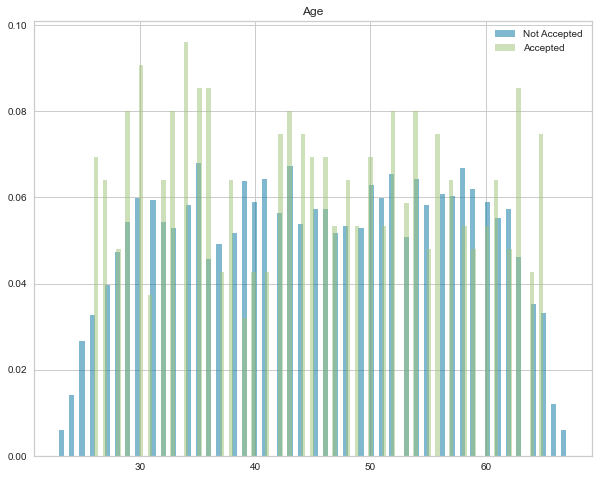

In [145]:
plt.figure(figsize=(10,8))
df['Age'][df['Personal Loan']==0].hist(bins=100,density=True,alpha=0.5,label='Not Accepted')
df['Age'][df['Personal Loan']==1].hist(bins=100,density=True,alpha=0.5,label='Accepted')
plt.legend()
plt.title('Age');

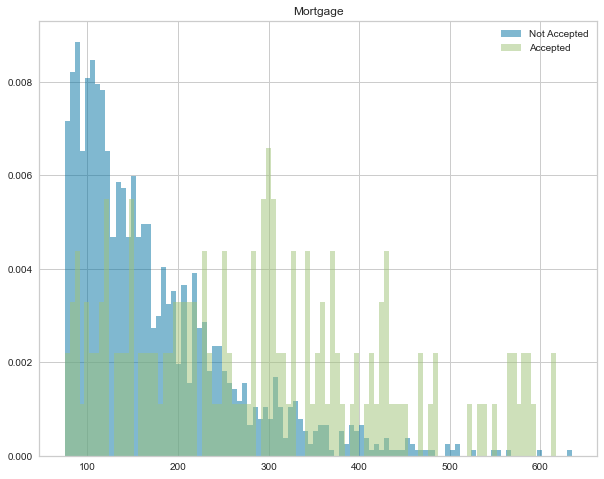

In [146]:
plt.figure(figsize=(10,8))
df['Mortgage'][(df['Personal Loan']==0)&(df['Mortgage']>0)].hist(bins=100,density=True,alpha=0.5,label='Not Accepted')
df['Mortgage'][(df['Personal Loan']==1)&(df['Mortgage']>0)].hist(bins=100,density=True,alpha=0.5,label='Accepted')
plt.legend()
plt.title('Mortgage');

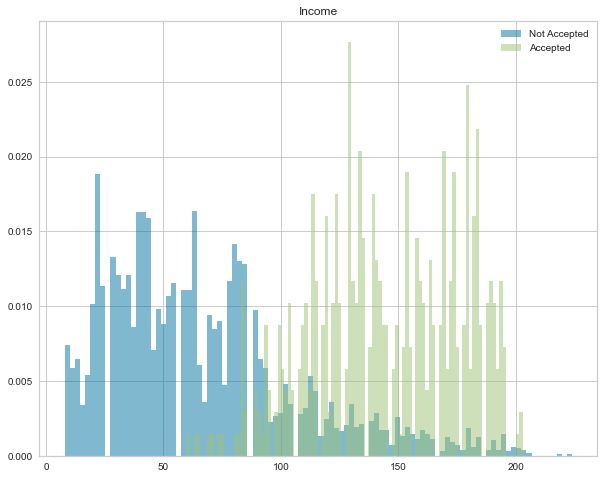

In [147]:
plt.figure(figsize=(10,8))
df['Income'][df['Personal Loan']==0].hist(bins=100,density=True,alpha=0.5,label='Not Accepted')
df['Income'][df['Personal Loan']==1].hist(bins=100,density=True,alpha=0.5,label='Accepted')
plt.legend()
plt.title('Income');

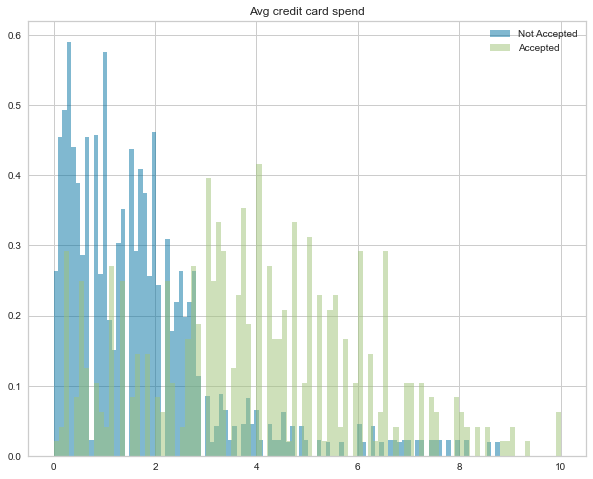

In [148]:
plt.figure(figsize=(10,8))
df['CCAvg'][df['Personal Loan']==0].hist(bins=100,density=True,alpha=0.5,label='Not Accepted')
df['CCAvg'][df['Personal Loan']==1].hist(bins=100,density=True,alpha=0.5,label='Accepted')
plt.legend()
plt.title('Avg credit card spend');

<Figure size 1080x1080 with 0 Axes>

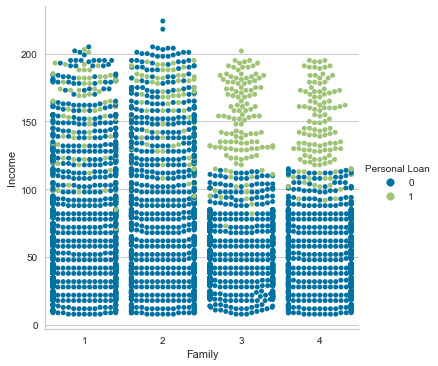

In [149]:
plt.figure(figsize=(15,15))
sns.catplot(x='Family',y='Income',hue='Personal Loan',data=df,kind='swarm');
plt.show();

In [25]:
pd.crosstab(df['Personal Loan'], df['CreditCard'],normalize='all')

CreditCard,0,1
Personal Loan,,
0,0.6386,0.2654
1,0.0674,0.0286


## Modeling

In [151]:
# Separate the independent attributes i.e. every column except personal loan
# Store the target column (Personal Loan) into Y array

x = df.loc[:, df.columns != 'Personal Loan']  # independent variables
y = df.loc[:, df.columns == 'Personal Loan']  # Target variable


In [152]:
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1.00,49,4,1.60,1,0,1,0,0,0
1,45,19.00,34,3,1.50,1,0,1,0,0,0
2,39,15.00,11,1,1.00,1,0,0,0,0,0
3,35,9.00,100,1,2.70,2,0,0,0,0,0
4,35,8.00,45,4,1.00,2,0,0,0,0,1


In [153]:
#Build the logistic regression model
import statsmodels.api as sm

# Create the training and test data set in the ratio of 70:30 respectively. Can be of any ratio...
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=7)



In [154]:
logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.133281
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Sat, 19 Sep 2020   Pseudo R-squ.:                  0.5835
Time:                        11:23:25   Log-Likelihood:                -466.48
converged:                       True   LL-Null:                       -1120.1
                                        LLR p-value:                1.219e-273
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.6304      1.864     -6.775      0.000     -16.285      -8.976
Age  

In [155]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1 ## <= 0.05
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
CD Account,3.68,39.73,0.98,0.00
Education,1.68,5.38,0.84,0.00
Family,0.77,2.17,0.68,0.00
CCAvg,0.16,1.18,0.54,0.00
Income,0.05,1.05,0.51,0.00
Online,-0.59,0.55,0.36,0.00
Securities Account,-0.82,0.44,0.30,0.01
CreditCard,-1.18,0.31,0.23,0.00
const,-12.63,0.00,0.00,0.00


#### Lets look at lr with sklearn

In [157]:
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1.00,49,4,1.60,1,0,1,0,0,0
1,45,19.00,34,3,1.50,1,0,1,0,0,0
2,39,15.00,11,1,1.00,1,0,0,0,0,0
3,35,9.00,100,1,2.70,2,0,0,0,0,0
4,35,8.00,45,4,1.00,2,0,0,0,0,1


In [158]:
y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [159]:
from sklearn.linear_model import LogisticRegression   # importing logistic regression from scikit learn

features = x.iloc[:,0:10].values
target = y.values


X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=7)

logreg = LogisticRegression(random_state=7)  #assigning a variable for the algorithm

logreg.fit(X_train, y_train) #training of model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [160]:
y_predict = logreg.predict(X_test)     #model is predicting y values based on test dataset given to the model

print("Trainig accuracy",logreg.score(X_train,y_train))  # this will give training accuracy as training data has been used
print()
print("Testing accuracy",logreg.score(X_test, y_test))   # this will give testing accuracy as testing data has been used

Trainig accuracy 0.9451428571428572

Testing accuracy 0.95


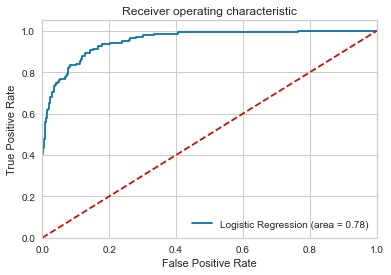

In [161]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [162]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()   


In [163]:
preds = logreg.predict(X_test)

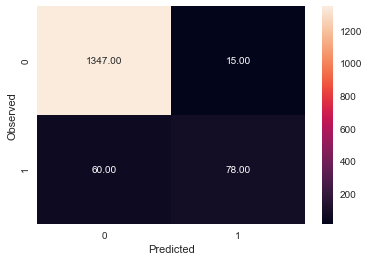

None

Recall: 0.5652173913043478

Precision: 0.8387096774193549

F1 Score: 0.6753246753246753

Roc Auc Score: 0.7771020877226584


In [164]:
print(draw_cm(y_test,preds))
print()
print("Recall:",recall_score(y_test,preds))
print()
print("Precision:",precision_score(y_test,preds))
print()
print("F1 Score:",f1_score(y_test,preds))
print()
print("Roc Auc Score:",roc_auc_score(y_test,preds))

In [169]:
threshold =0.3205
preds = np.where(logreg.predict_proba(X_test)[:,1]>threshold,1,0)

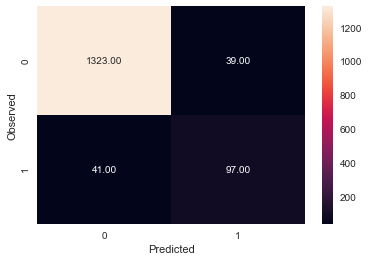

None

Recall: 0.7028985507246377

Precision: 0.7132352941176471

F1 Score: 0.708029197080292

Roc Auc Score: 0.8371320947455787


In [170]:
print(draw_cm(y_test,preds))
print()
print("Recall:",recall_score(y_test,preds))
print()
print("Precision:",precision_score(y_test,preds))
print()
print("F1 Score:",f1_score(y_test,preds))
print()
print("Roc Auc Score:",roc_auc_score(y_test,preds))

In [167]:
precisions,recalls,thresholds = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:,1])

In [168]:
for x,y,z in zip(precisions,recalls,thresholds):
    if (x>0.60 and y>0.60):
        print('At threshold ' , z , 'we are able to get precision of ',x ,' and recall ',y)

At threshold  0.23243401049804768 we are able to get precision of  0.6011560693641619  and recall  0.7536231884057971
At threshold  0.2351453428023242 we are able to get precision of  0.6046511627906976  and recall  0.7536231884057971
At threshold  0.23552085799853628 we are able to get precision of  0.6081871345029239  and recall  0.7536231884057971
At threshold  0.2360820829763 we are able to get precision of  0.611764705882353  and recall  0.7536231884057971
At threshold  0.24010502788994986 we are able to get precision of  0.6153846153846154  and recall  0.7536231884057971
At threshold  0.2414560843908176 we are able to get precision of  0.6190476190476191  and recall  0.7536231884057971
At threshold  0.2426078284757668 we are able to get precision of  0.6167664670658682  and recall  0.7463768115942029
At threshold  0.24604804023339377 we are able to get precision of  0.6204819277108434  and recall  0.7463768115942029
At threshold  0.24805521368316139 we are able to get precision o

In [ ]:
#### Here the model performs better in testing than training. Therefore, it is a good model

In [171]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1362
           1       0.84      0.57      0.68       138

    accuracy                           0.95      1500
   macro avg       0.90      0.78      0.82      1500
weighted avg       0.95      0.95      0.95      1500



In [172]:
recall_score(y_test,y_predict)

0.5652173913043478

In [173]:
precision_score(y_test,y_predict)

0.8387096774193549

In [174]:
f1_score(y_test,y_predict)

0.6753246753246753

In [175]:
roc_auc_score(y_test,y_predict)

0.7771020877226584

### Params

In [183]:
np.random.seed(123)
np.random.randn(1)

array([-1.0856306])

In [189]:
np.random.seed(122)
np.random.randn(1)

array([1.71928769])

In [186]:
# Checking Parameters of logistic regression
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### 'C': 1.0
Inverse of regularization strength; must be a positive float

#### penalty : {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
Used to specify the norm used in the penalization.  

#### solver : {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem. 
Think like the way we find out the best coefficients

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
‘liblinear’ and ‘saga’ also handle L1 penalty
‘saga’ also supports ‘elasticnet’ penalty
‘liblinear’ does not support setting penalty='none'

#### class_weight : { dict or ‘balanced’} , default=None
Weights associated with classes in the form {class_label: weight}.

#### multi_class{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’
If the option chosen is ‘ovr’, then a binary problem is fit for each label.

In [ ]:
#If we dont specify the parameters in the model it takes default value

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Please refer above link for the details of parameters

In [191]:
def get_roc_cure(model,title):
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label= title + '(area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
#     plt.savefig('Log_ROC')
    plt.show()

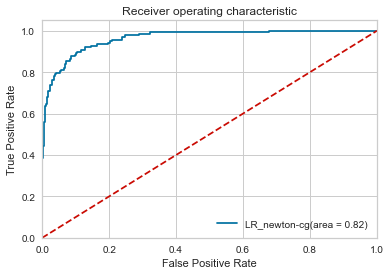

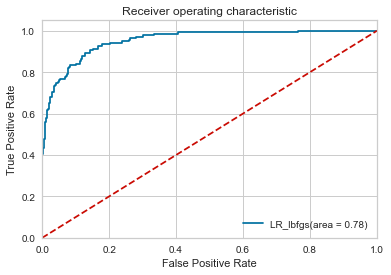

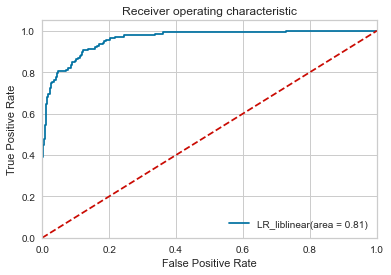

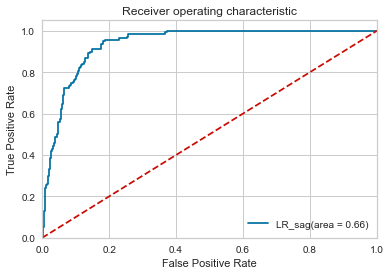

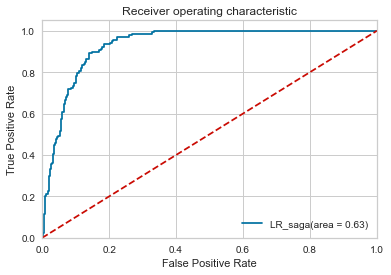

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.946, 0.945, 0.947, 0.908, 0.904]

[0.955, 0.95, 0.956, 0.919, 0.916]


In [192]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=7,penalty='l2', solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test) 
    get_roc_cure(model,'LR_'+i)
    train_score.append(round(model.score(X_train,y_train),3))
    test_score.append(round(model.score(X_test,y_test),3))
    
    
print(solver)
print()
print(train_score)
print()
print(test_score)

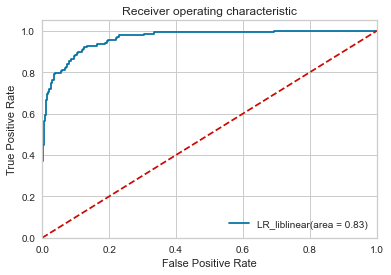

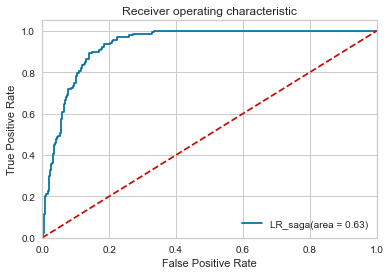

['liblinear', 'saga']

[0.946, 0.904]

[0.957, 0.916]


In [193]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']  # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=7,penalty='l1', solver=i)  # changed value of penaly to 'l1'
    model.fit(X_train,y_train) 
    y_predict = model.predict(X_test)     
    get_roc_cure(model,'LR_'+i)
    train_score.append(round(model.score(X_train,y_train),3))
    test_score.append(round(model.score(X_test,y_test),3))
    
    
print(solver)
print()
print(train_score)
print()
print(test_score)

In [ ]:
## Highest accuracy is same 'l1' with 'liblinear' and 'l2' with 'lbfgs'
# choose any one

In [194]:
model = LogisticRegression(random_state=7,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(X_train,y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))   

Trainig accuracy 0.892

Testing accuracy 0.8933333333333333


In [ ]:
## Accuracy decreased so removing class weight from the model

In [195]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=7,penalty='l1',solver='liblinear', C=i)  # changing values of C
    model.fit(X_train,y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3))
    test_score.append(round(model.score(X_test,y_test),3))  # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.921, 0.945, 0.947, 0.946, 0.946, 0.946]

[0.935, 0.95, 0.953, 0.957, 0.958, 0.957]


In [ ]:
## Best testing accuracy is obtained for C=0.75, which is default

Trainig accuracy 0.946

Testing accuracy 0.958

Confusion Matrix


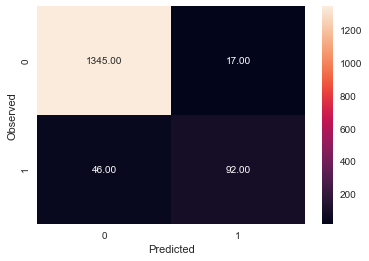

None

Recall: 0.6666666666666666

Precision: 0.8440366972477065

F1 Score: 0.7449392712550607

Roc Auc Score: 0.8270925110132158


In [196]:
#Therefore final model is
model = LogisticRegression(random_state=7,penalty='l1',C=0.75, solver='liblinear') 
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test,y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

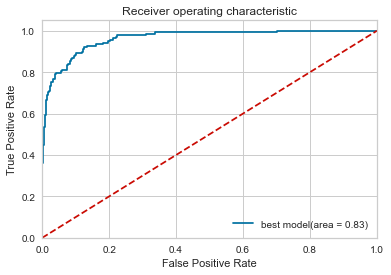

In [197]:
get_roc_cure(model,'best model')

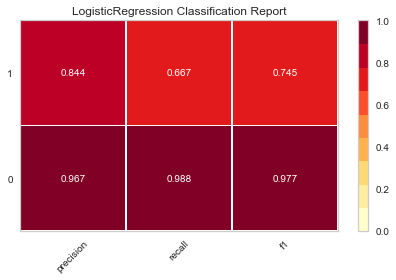

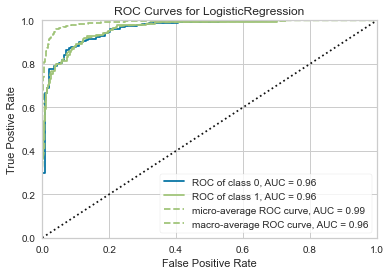

In [198]:
# Additional

from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(X_train,y_train)
viz.score(X_test,y_test)
viz.show();

roc = ROCAUC(model)
roc.fit(X_train,y_train)
roc.score(X_test,y_test)
roc.show();

https://towardsdatascience.com/stop-saying-precision-and-recall-to-business-leaders-f17082ab5052#:~:text=To%20put%20it%20simply%2C%20precision,out%20on%20high%20value%20customers%20.&text=Your%20precision%20is%20the%20hit,capture%20rate%20of%20loan%20payers.